# DM-37676 AuxTel compare quickLook vs AOS ISR

In [1]:
from lsst.daf.butler import Butler
import batoid
import danish
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import astropy.io.fits as fits
from scipy.signal import convolve2d
from tqdm.notebook import tqdm
butler = Butler('/repo/main', collections=['LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook'])

In [2]:
day = 20210608
seq = 394
dataId = {'day_obs': day, 'seq_num': seq, 'detector':0}
postIsr = butler.get('quickLookExp', dataId)

In [38]:
import analysis_tools as at
import importlib as imp
imp.reload(at)


<module 'analysis_tools' from '/sdf/data/rubin/user/scichris/WORK/AOS/analysis_tools.py'>

Note: what's called below "myISR" is the result of running 

    # Run pipeline command

    instrument = "lsst.obs.lsst.Latiss"
    input_coll = "LATISS/raw/all,LATISS/calib"
    output_coll = 'u/scichris/Latiss/DM-37629'


    repoDir = '/sdf/data/rubin/repo/main/'


    pipelineYaml = os.path.join(
        os.getcwd(),'DM-37629', "testLatissPipelineISRonly.yaml "
    )

    expids = [2022040500795,2022040500796]
    pipetaskCmd = "pipetask run "
    pipetaskCmd += f"-b {repoDir} "  # Specify repo
    pipetaskCmd += f"-i {input_coll} "  # Specify collections with data to use
    pipetaskCmd += f" --output {output_coll} " # specify output collection 
    pipetaskCmd += f" --instrument {instrument} "
    pipetaskCmd += f" --register-dataset-types "
    pipetaskCmd += f" -p {pipelineYaml}" # specify yaml config file 

    pipetaskCmd += f" -d 'exposure IN {tuple(expids)}'"

    # Run pipeline task
    #

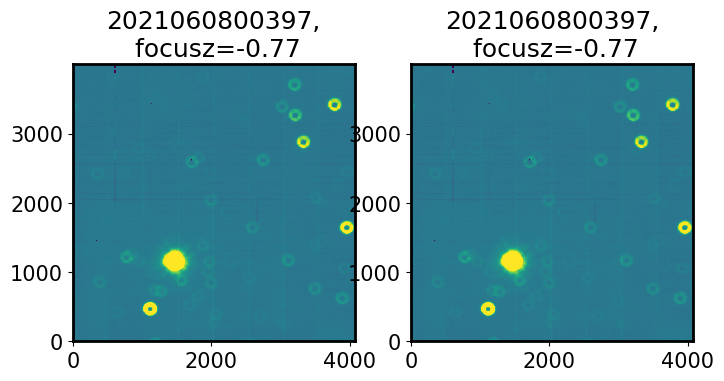

In [34]:
at.preview_auxtel_pair(day = 20210608, seqNums=[394,397],
                      datasetRefOrType='quickLookExp', 
                      collections=['LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook'])

show the effect of cutting off the edges:

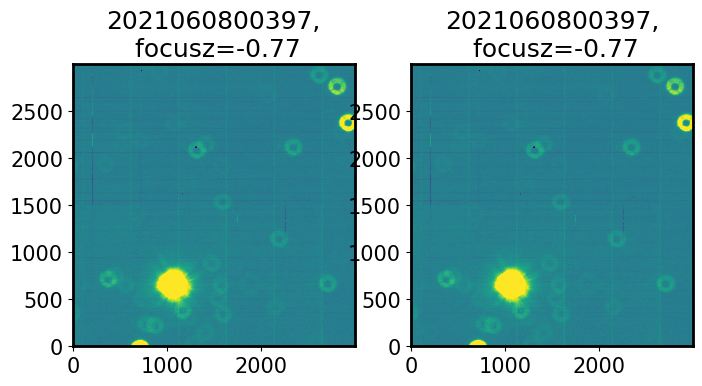

In [41]:
at.preview_auxtel_pair(day = 20210608, seqNums=[394,397],
                      datasetRefOrType='quickLookExp', 
                      collections=['LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook'],
                       limits=[1900,2000,1500]
                      )


Compare my ISR to the one in the `quickLook` collection...

Running "myISR" : 

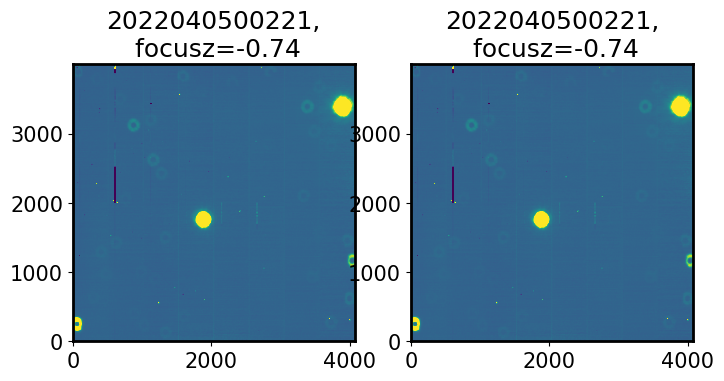

In [36]:
at.preview_auxtel_pair(day = 20220405, seqNums=[220,221],datasetRefOrType='postISRCCD',
                      collections=['LATISS/raw/all', 'LATISS/calib', 'u/scichris/Latiss/DM-37676'])

And the `quickLook` : 

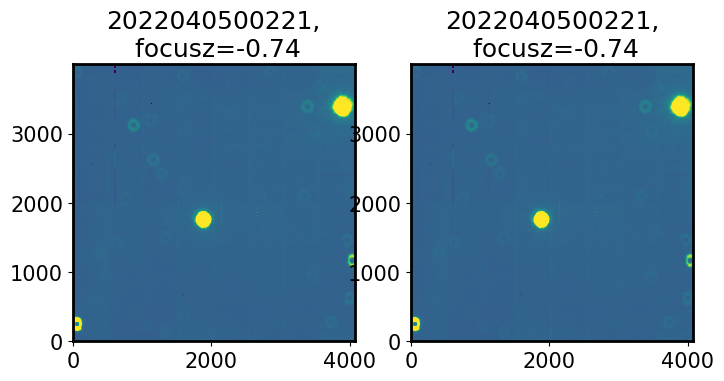

In [37]:
at.preview_auxtel_pair(day = 20220405, seqNums=[220,221],datasetRefOrType='quickLookExp',
                      collections=['LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook'])

Hmm.... The `quickLook` collection already has nice-looking postISR image! 

Compare for `20220407` : 

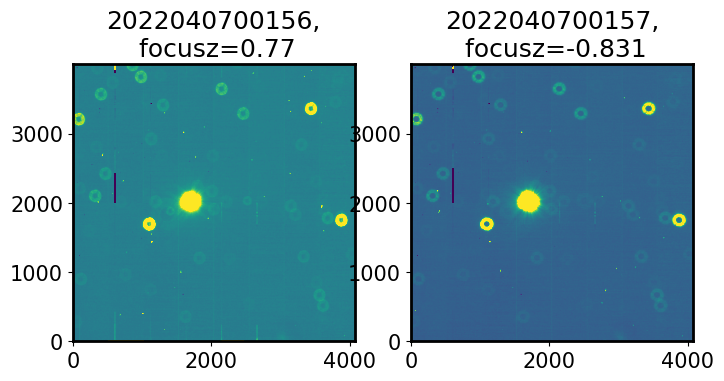

In [2]:
import analysis_tools as at
# the ISR with 
#pipelineYaml = os.path.join(os.getcwd(),'DM-37629', "testLatissPipelineISRonly.yaml")
at.preview_auxtel_pair(day = 20220407, seqNums=[156,157],datasetRefOrType='postISRCCD',
                      collections=['LATISS/raw/all', 'LATISS/calib', 'u/scichris/Latiss/DM-37269'])

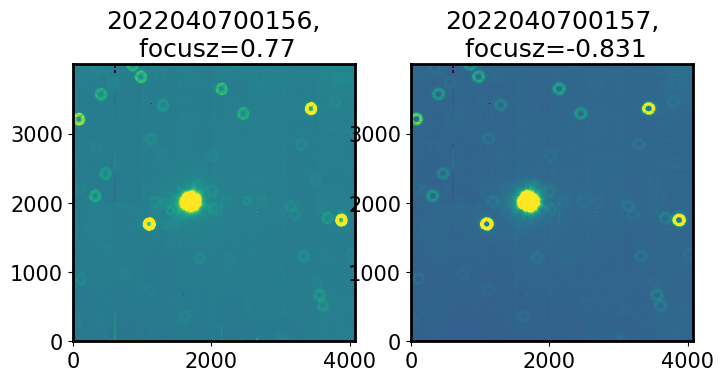

In [4]:
# the "bestEffortISR" 
at.preview_auxtel_pair(day = 20220407, seqNums=[156,157], datasetRefOrType='quickLookExp',
                      collections=['LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook']
                      )
    